In [2]:
#linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = np.linspace (0, 2*np.pi, 10)
y = np.sin(x)

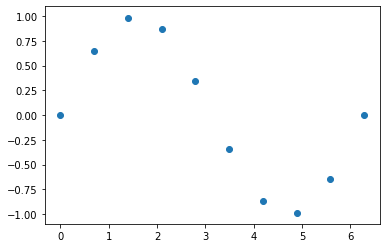

In [3]:
plt.scatter (x, y)

In [4]:
y_true = np.sin (x) + np.random.normal (0,0.09, 10)

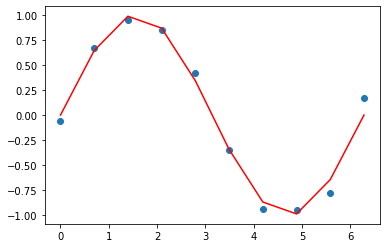

In [5]:
plt.scatter (x, y_true)
plt.plot (x, np.sin (x), color = "red")
plt.show ()

In [7]:
def data (x, o):
    
    df = []
    for i in x:
        z = []
        for j in range (o):
            z.append (i**j)
        df.append (z)
        
    df = pd.DataFrame (df)
    return df

In [8]:
df = data (x, 5)
df

,0,1,2,3,4
0,1.0,0.000000,0.000000,0.000000,0.000000
1,1.0,0.698132,0.487388,0.340261,0.237547
2,1.0,1.396263,1.949551,2.722087,3.800751
3,1.0,2.094395,4.386491,9.187045,19.241302
4,1.0,2.792527,7.798206,21.776699,60.812016
5,1.0,3.490659,12.184697,42.532615,148.466836
6,1.0,4.188790,17.545963,73.496360,307.860831
7,1.0,4.886922,23.882006,116.709497,570.350197
8,1.0,5.585054,31.192824,174.213593,972.992256
9,1.0,6.283185,39.478418,248.050213,1558.545457


In [12]:
def find_weights (X, Y):
    
    rhs = np.matmul (X.T, Y)
    lhs = np.matmul (X.T, X)
    
    return np.matmul (np.linalg.inv (lhs), rhs)

In [13]:
w = find_weights (df.values, y_true)

In [14]:
w

array([-0.0941301 ,  1.64502215, -0.70710228,  0.05233615,  0.0031317 ])

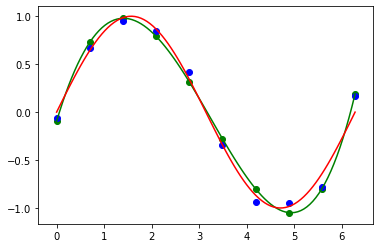

In [20]:
plt.scatter (x, np.matmul(df.values, w), color= "green")
val = np.linspace (0, 2*np.pi, 100)
plt.plot (val, np.matmul (data (val, 5).values, w), color = "green")
plt.scatter (x, y_true, color="blue")
plt.plot (val, np.sin (val), color = "red")
plt.show ()